In [55]:
from scipy import stats

1.  CDF(Cumulative distribution function) always calculates the area on the left hand side of the value.
2.   The total area under a probability distribution curve is always 1.(This represents 100% of the possible outcomes.)
3. To find the area (or probability) to the right of a value:
P(X>x) = 1 − CDF(x)
**This is because the left side + right side = whole curve = 1.**


---



**Ex:** Find the probablity that a normally distributed random variable has a mean of 60 and a standard deviation of 10 and we want to find the probability that X is less than 70.

**from scipy import stats          
stats.norm.cdf(x, loc=mean, scale=std)**

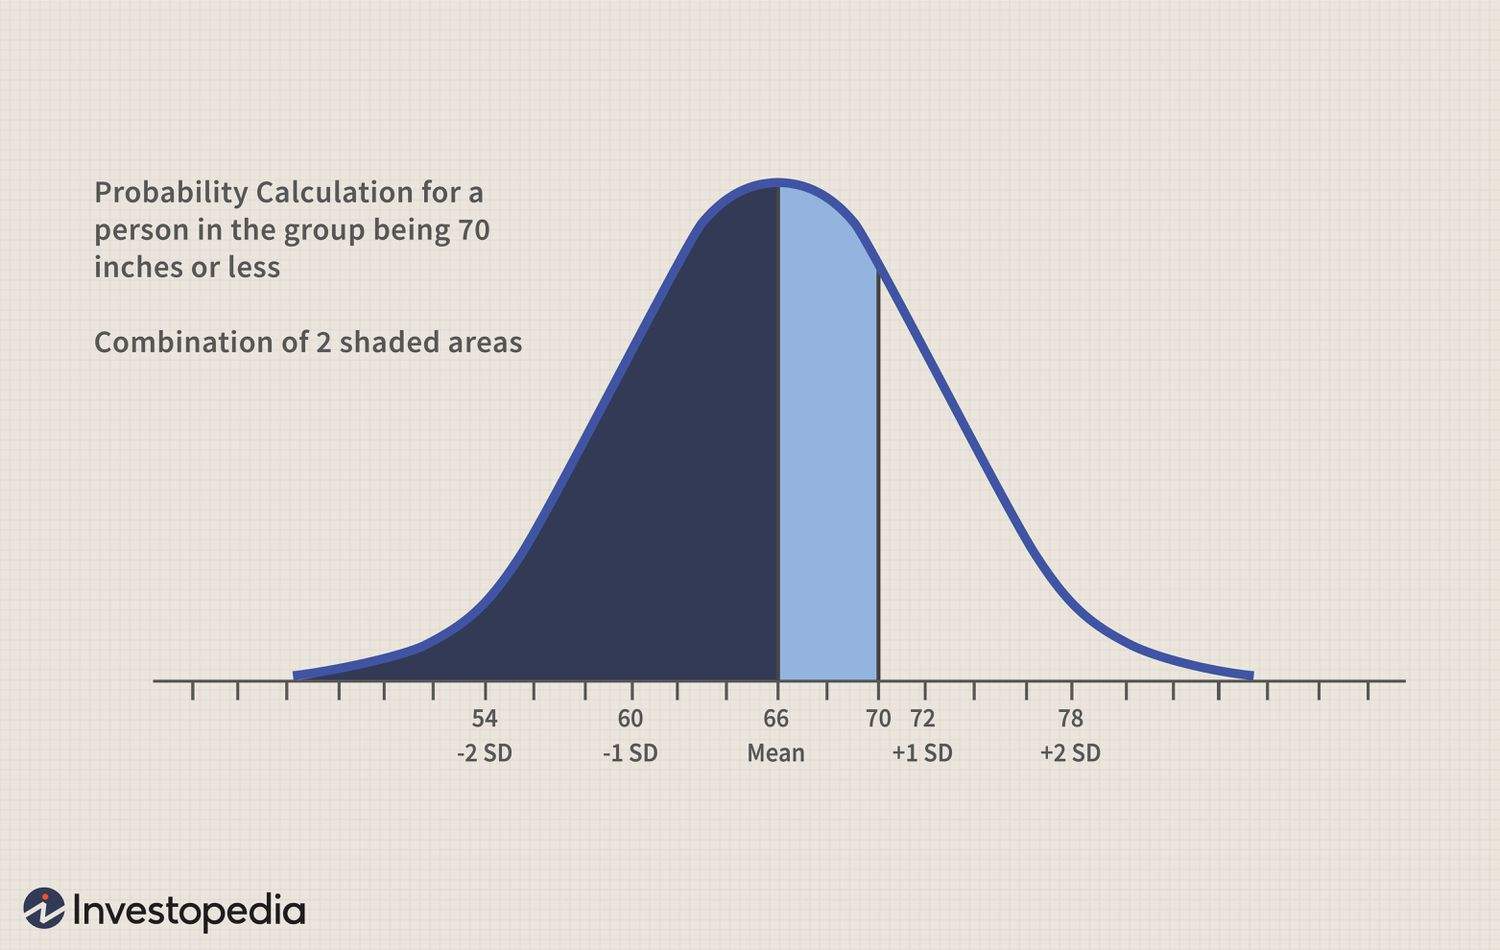

In [56]:
stats.norm.cdf(70, 60, 10)

np.float64(0.8413447460685429)

In [57]:
1 - stats.norm.cdf(80, 60, 10)

np.float64(0.02275013194817921)

**Ex.** Suppose GMAT scores can be resonably modeled using a normal distribution
μ = 711 and σ = 29 what is p(x <= 680)?

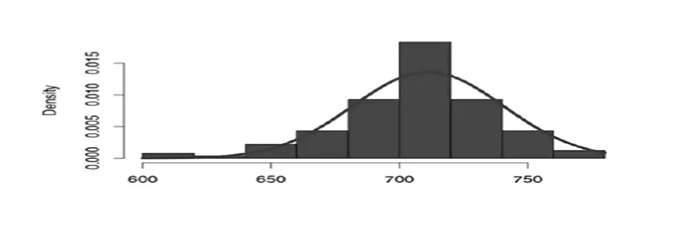

In [58]:
stats.norm.cdf(680, 711, 29)

np.float64(0.14254260383881612)

In [59]:
#P(x >= 750) greater
1 - stats.norm.cdf(750, 711, 29)

np.float64(0.08934045974656879)

In [60]:
#(680 <= x <= 740)
stats.norm.cdf(740, 711, 29)

np.float64(0.8413447460685429)

In [61]:
stats.norm.cdf(740, 711, 29) - stats.norm.cdf(680, 711, 29)
#0.8413447460685429 - 0.14254260383881612

np.float64(0.6988021422297268)

In [62]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [63]:
beml_df = pd.read_csv("/content/BEML.csv")
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [64]:
glaxo_df = pd.read_csv("/content/GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [65]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [66]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [67]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [68]:
beml_df.dtypes

,0
Date,object
Close,float64


In [69]:
glaxo_df.dtypes

,0
Date,object
Close,float64


In [70]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [71]:
beml_df.head() #now date col is acting as an index

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [72]:
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


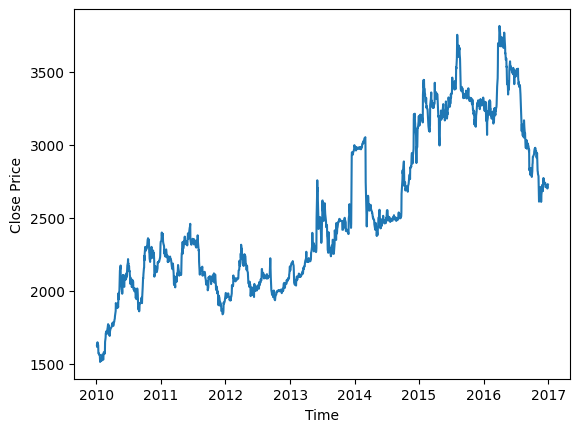

In [73]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

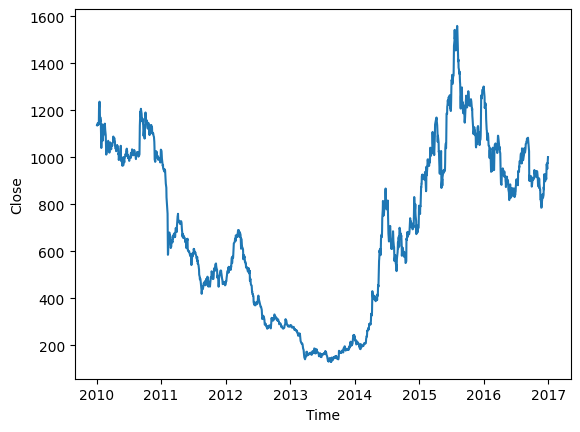

In [74]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [75]:
# Gain is for each day. Gain = (next day's price - current day's price)/current day's price
# We are assuming that gain is coming from normal distribution
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [76]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [77]:
beml_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [78]:
#drop NaN values (first row)
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [79]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [80]:
beml_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


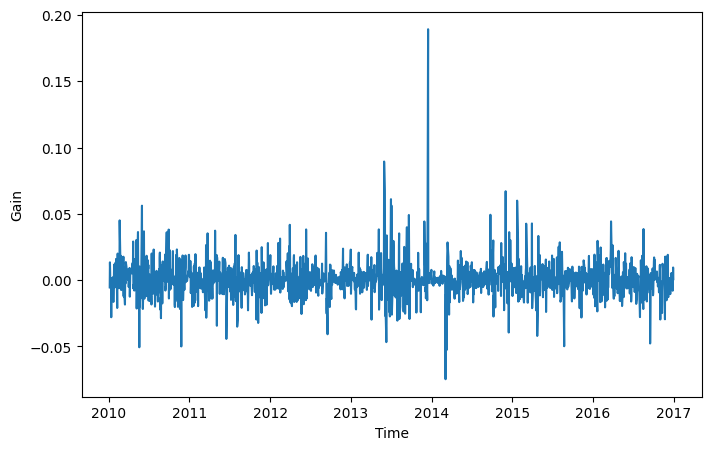

In [81]:
#GLAXO : Plot the gain. Over the years gain is not changing much.
#In 2014 gain was highest i.e. 20% and highest loss upto 7%. Sometimes postive and sometimes negative gain
plt.figure(figsize = (8, 5))
plt.plot(glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('Gain');

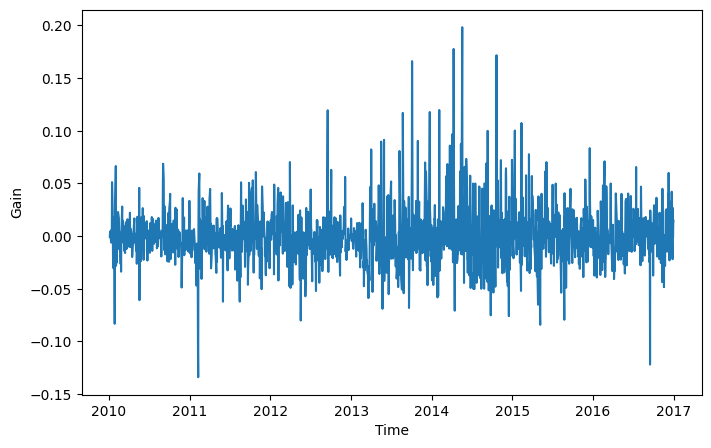

In [82]:
#BEML: from 2010 to 2012 gain wan on olwer side and after that gain increased upto 2015
plt.figure(figsize = (8, 5))
plt.plot(beml_df.gain);
plt.xlabel('Time');
plt.ylabel('Gain');

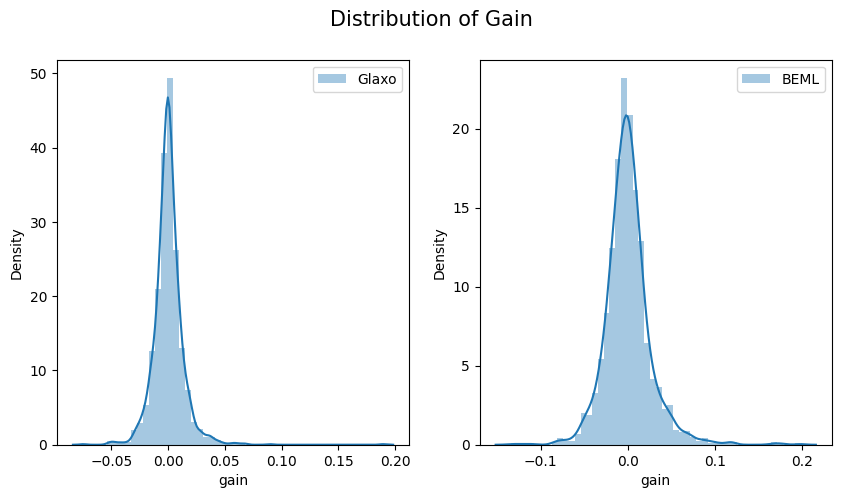

In [83]:
#Bell shaped normal distribution
plt.figure(figsize = (10,5))
plt.suptitle('Distribution of Gain',fontsize = 15)
plt.subplot(1,2,1) #1 row, 2 columns, 1st plot(position)
sn.distplot(glaxo_df.gain, label='Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend() #show legend in plot( on top of plot)
plt.subplot(1,2,2)
sn.distplot(beml_df.gain, label='BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

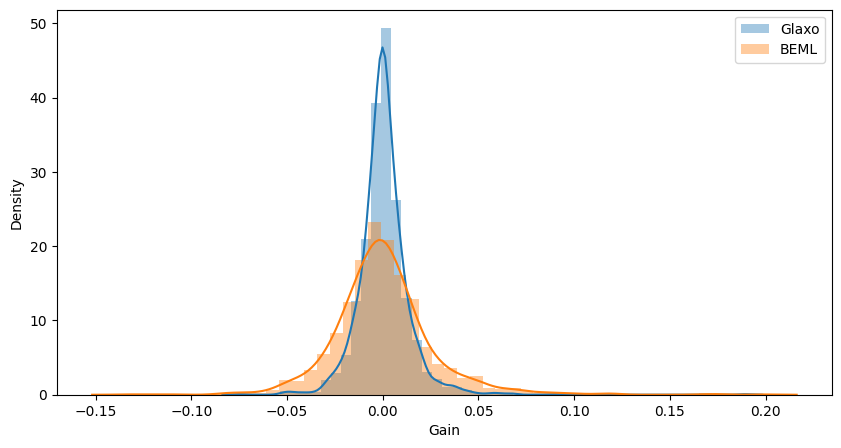

In [84]:
plt.figure(figsize = (10,5))
sn.distplot(glaxo_df.gain, label = 'Glaxo')
sn.distplot(beml_df.gain, label = 'BEML')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()
#for BEML there is more variance (high risk or volatality) than Glaxo

In [85]:
glaxo_df.gain.mean()

np.float64(0.0003860410825922916)

In [86]:
#Glaxo Mean and Standard Deviation
print('Glaxo Mean:',round(glaxo_df.gain.mean(), 4))
print('Glaxo Standard Deviation:',round(glaxo_df.gain.std(), 4))

Glaxo Mean: 0.0004
Glaxo Standard Deviation: 0.0134


In [87]:
#BEML Mean and Standard Deviation
print('BEML Mean:',round(beml_df.gain.mean(), 4))
print('BEML Standard Deviation:',round(beml_df.gain.std(), 4))

BEML Mean: 0.0003
BEML Standard Deviation: 0.0264


In [88]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo - left of 0 i.e -0.02
stats.norm.cdf( -0.02, 0.0004, 0.0134) #norm.cdf(0.02, loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std())
#loc=glaxo_df.gain.mean(),
#scale=glaxo_df.gain.std()) #there are 6% of chances of making 2% loss or higher in Glaxo

np.float64(0.06395593743937553)

### **norm.cdf() and norm.ppf() function difference**

In [89]:
# (Cumulative Distribution Function): norm.cdf(normal distribution value, loc, scale): calculates probablity for a given normal distribution value
# (Percent Point Function): norm.ppf(probability, loc, scale): calculates probablity for a given normal distribution value
stats.norm.ppf(0.06395593743937553, 0.0004, 0.0134) #output of above command, loc, scale

np.float64(-0.02)

In [90]:
#Probability of making 2% gain or higher gain in Glaxo - to the right of 0.02
1 - stats.norm.cdf(0.02, 0.0004, 0.0134) #7% chances of having at least 2% or higher gain, Glaxo seems safer than BEML

np.float64(0.07177658173190637)

### **Compute 2% loss or gain for BEML**
Chances of profit or loss are high with BEML than GLAX


In [91]:
stats.norm.cdf(-0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())

np.float64(0.22155987503755287)

In [92]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())

np.float64(0.22769829484075355)

In [93]:
from scipy import stats
stats.norm.cdf(1.65, 0, 1) #Cumulative Distribution Function - calculates probablity for a given normal distribution value

np.float64(0.9505285319663519)

In [94]:
stats.norm.ppf(0.95, 0, 1) #Percent Point Function - calculates probablity for a given normal distribution value for which a given probability is the required value.
#cdf() and ppf() are inverse of each other

np.float64(1.6448536269514722)